<a href="https://colab.research.google.com/github/kiptoo-bit/Kenya-Counties/blob/main/Kenya_Counties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geopandas is as the name suggests:

GeoPandas = pandas + geo
GeoPandas is an open-source package that gives you access to all of the functionality of pandas, which is the primary data analysis tool for working with tabular data in Python. GeoPandas extends pandas with attributes and methods for working with geospatial data.

Consists of/ Depends on:
Shapely:- For Geometric operations.
Fiona:- For file access.
Matplotlib:- For plotting.

# Installation.

In [ ]:
!pip install geopandas

Import Libraries
Let's start by importing the libraries that we will use

In [ ]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline

**Reading a shapefile**
shapefile: a type of geospatial data that holds vector data

Files that come along with the shapefile and their meanings:

**shp:** The main file that stores the feature geometry.

**shx:** The index file that stores the index of the feature geometry

**dbf:** The dBASE table that stores the attribute information of features

**prj:**The file that stores the coordinate system information. (should be required!)

**xml:** Metadata —Stores information about the shapefile.

**cpg:** Specifies the code page for identifying the character set to be used.

Let's try it out with Kenya counties, and use geopandas for the first time. **gpd.read_file** is a flexible function that let's you read in many different types of geospatial data. Since I'm working in Google Colab, I will specify the directory(content...) from where the Shapefile can be accessed(NB:- You can also do this by specifying the directory if you are working with jupyter notebook in your local machine)


In [ ]:
# Read in the counties shapefile
counties = gpd.read_file('/content/Kenya_county_dd.shp')

<Axes: >

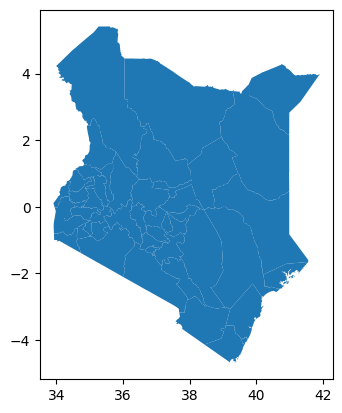

In [ ]:
# Plot out Kenya counties
counties.plot()

# DATA EXPLORATION:

**DATA STRUCTURES:**
The core data structure in GeoPandas is the geopandas.**GeoDataFrame**, a subclass of **pandas.DataFrame**, that can store geometry columns and perform spatial operations. The geopandas.**GeoSeries**, a subclass of **pandas.Series**, handles the geometries. Therefore, your GeoDataFrame is a combination of pandas.Series, with traditional data (numerical, boolean, text etc.), and geopandas.GeoSeries, with geometries (points, polygons etc.). You can have as many columns with geometries as you wish; there’s no limit typical for desktop GIS software.

Each GeoSeries can contain any geometry type (you can even mix them within a single array) and has a GeoSeries.crs attribute, which stores information about the projection (CRS stands for Coordinate Reference System). Therefore, each GeoSeries in a GeoDataFrame can be in a different projection, allowing you to have, for example, multiple versions (different projections) of the same geometry.

Only one GeoSeries in a GeoDataFrame is considered the active geometry, which means that all geometric operations applied to a GeoDataFrame operate on this active column.


DATA EXPLORATION:

In [ ]:
# Find the number of rows and columns in counties
counties.shape

(47, 3)

In [ ]:
# Look at the first couple of rows in our geodataframe
counties.head()

,COUNTY_NAM,ID,geometry
0,Marsabit,1,"POLYGON ((36.05031 4.45143, 36.05505 4.45143, ..."
1,Wajir,2,"POLYGON ((39.3191 3.49897, 39.31991 3.49983, 3..."
2,Samburu,3,"POLYGON ((36.60238 2.4046, 36.60342 2.40375, 3..."
3,Isiolo,4,"POLYGON ((39.29696 1.66981, 39.2973 1.66923, 3..."
4,Baringo,5,"POLYGON ((35.78546 1.65586, 35.79502 1.6411, 3..."


In [ ]:
# Look at all the variables included in our data
counties.columns

NameError: name 'counties' is not defined

**PLOTTING:**


In the geodataframe these geometries are encoded in a format known as Well-Known Text (WKT). For example:

POINT (30 10)
LINESTRING (30 10, 10 30, 40 40)
POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))
where coordinates are separated by a space and coordinate pairs by a comma

Your geodataframe may also include the variants multipoints, multilines, and multipolgyons if the row-level feature of interest is comprised of multiple parts. For example, a geodataframe of states, where one row represents one state, would have a POLYGON geometry for Utah but MULTIPOLYGON for Hawaii, which includes many islands.

It's ok to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same geodatafame

You can check the types of geometries in a geodataframe or a subset of the geodataframe by combining the type and unique methods.

In [ ]:
# Let's check what geometries we have in our counties geodataframe
counties['geometry'].head()

,geometry
0,"POLYGON ((36.05031 4.45143, 36.05505 4.45143, ..."
1,"POLYGON ((39.3191 3.49897, 39.31991 3.49983, 3..."
2,"POLYGON ((36.60238 2.4046, 36.60342 2.40375, 3..."
3,"POLYGON ((39.29696 1.66981, 39.2973 1.66923, 3..."
4,"POLYGON ((35.78546 1.65586, 35.79502 1.6411, 3..."


In [ ]:
# Let's check to make sure that we only have polygons and multipolygons
counties['geometry'].type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

<Axes: >

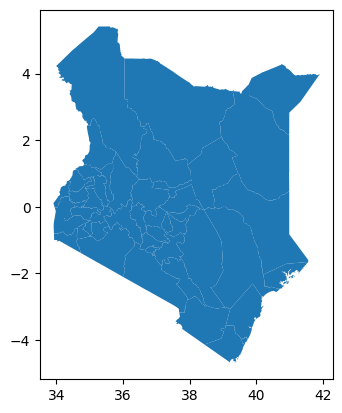

In [ ]:
counties.plot()

Just like with other plots you can make in Python, we can start customizing our map with colors, size, etc.

In [ ]:
# We can run the following line of code to get more info about the parameters we can specify:

?counties.plot

<Axes: >

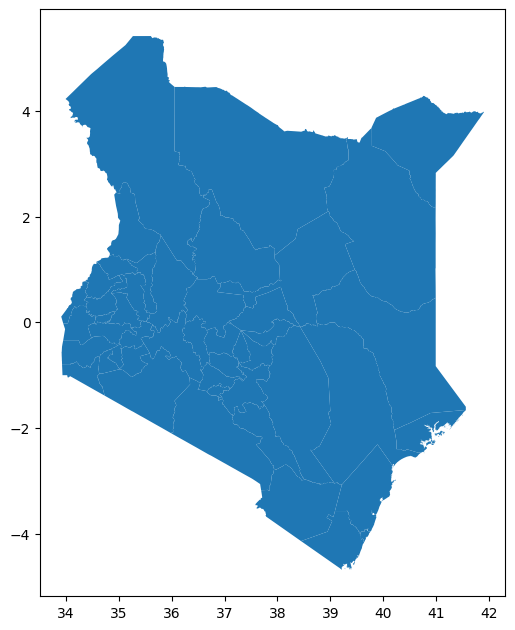

In [ ]:
# Make the figure size bigger
counties.plot(figsize=(6,9))

dding functionality and Cartographic elements

In [ ]:
!pip install matplotlib-scalebar contextily

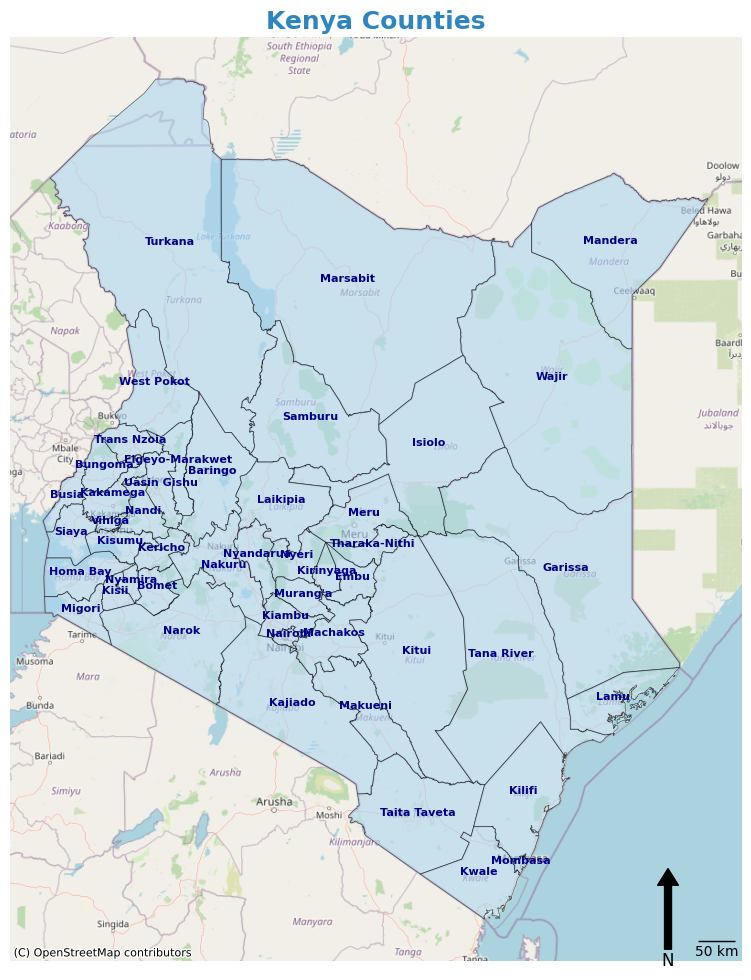

In [ ]:
import contextily as ctx  # For adding basemaps
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# Assuming counties is already loaded as a GeoDataFrame

# Reproject to EPSG:3857 for the basemap
counties = counties.to_crs(epsg=3857)

# Plotting setup
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the counties on top of the basemap
counties.plot(
    ax=ax,
    color='#AED6F1',           # Fill color for polygons
    edgecolor='black',          # Border color for polygons
    linewidth=0.5,              # Border line width
    alpha=0.6                   # Transparency to see the basemap underneath
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Enhance map with labels for each county
for idx, row in counties.iterrows():
    centroid = row['geometry'].centroid
    plt.text(centroid.x, centroid.y, row['COUNTY_NAM'],
             fontsize=8, ha='center', color='darkblue', fontweight='bold')

# Add a title and remove axis for a cleaner look
ax.set_title('Kenya Counties', fontsize=18, weight='bold', color='#2E86C1')
ax.axis('off')

# Add a north arrow
x, y, arrow_length = 0.9, 0.1, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, xycoords=ax.transAxes)

# Add a scale bar
scalebar = AnchoredSizeBar(ax.transData,
                           50000, '50 km', 'lower right',  # Adjust based on projected units
                           pad=0.1, color='black', frameon=False,
                           size_vertical=1)
ax.add_artist(scalebar)

# Show plot
plt.show()

# Further Exploration:
QUERYING DATA
Since we will later use/ do our analysis later we wi;; use only one county.
Therefore to query the geodataframe for our specific county, we follow the following steps:

In [ ]:
# See all county names included in our dataset
counties['COUNTY_NAM'].values

array(['Marsabit', 'Wajir', 'Samburu', 'Isiolo', 'Baringo',
       'Elgeyo-Marakwet', 'Garissa', 'Laikipia', 'Meru', 'Nakuru',
       'Nyandarua', 'Tharaka-Nithi', 'Kericho', 'Nyeri', 'Kirinyaga',
       'Embu', 'Homa Bay', 'Bomet', 'Nyamira', 'Narok', 'Kisii',
       "Murang'a", 'Migori', 'Taita Taveta', 'Bungoma', 'Turkana',
       'Tana River', 'Kiambu', 'Mandera', 'West Pokot', 'Trans Nzoia',
       'Kakamega', 'Busia', 'Kajiado', 'Kitui', 'Kisumu', 'Mombasa',
       'Makueni', 'Machakos', 'Nandi', 'Lamu', 'Nairobi', 'Siaya',
       'Uasin Gishu', 'Vihiga', 'Kilifi', 'Kwale'], dtype=object)

In [ ]:
counties

,COUNTY_NAM,ID,geometry
0,Marsabit,1,"POLYGON ((4013101.955 496030.646, 4013629.37 4..."
1,Wajir,2,"POLYGON ((4376982.551 389745.357, 4377072.152 ..."
2,Samburu,3,"POLYGON ((4074558.175 267757.264, 4074673.68 2..."
3,Isiolo,4,"POLYGON ((4374517.457 185908.538, 4374555.676 ..."
4,Baringo,5,"POLYGON ((3983619.344 184355.377, 3984683.942 ..."
5,Elgeyo-Marakwet,6,"POLYGON ((3973759.816 142950.855, 3973776.378 ..."
6,Garissa,7,"POLYGON ((4392903.96 110850.929, 4392900.987 1..."
7,Laikipia,8,"POLYGON ((4103510.823 82850.779, 4103506.151 8..."
8,Meru,9,"POLYGON ((4168244.068 32568.864, 4168960.453 3..."
9,Nakuru,10,"POLYGON ((4035757.465 20495.588, 4035776.999 2..."


Now we can create a new geodataframe called Uasin Gishu_county that is a subset of our counties geodataframe.

In [ ]:
Uasin_Gishu_county = counties.loc[counties['COUNTY_NAM'] == 'Uasin Gishu'].copy().reset_index(drop=True)

<Axes: >

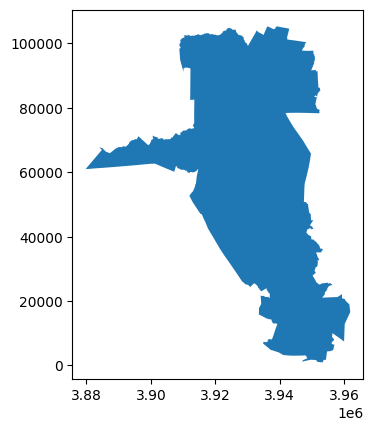

In [ ]:
# Plot our newly subsetted geodataframe
Uasin_Gishu_county.plot()

You can also make dynamic plots of one or more county without saving to a new gdf.

<Axes: >

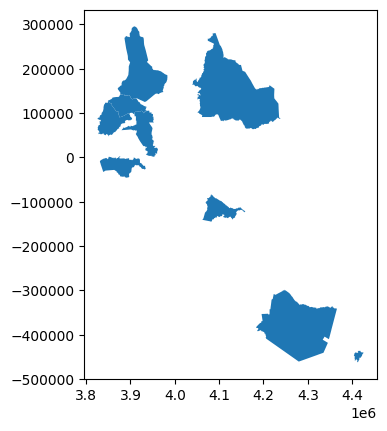

In [ ]:
bay_area_counties = ['Uasin Gishu', 'Mombasa', 'Kisumu', 'Samburu', 'Taita Taveta',
                        'West Pokot', 'Kiambu', 'Bungoma', 'Trans Nzoia', 'Migori	']
counties.loc[counties['COUNTY_NAM'].isin(bay_area_counties)].plot()

saving your data

In [ ]:
Uasin_Gishu_county.to_file("/content/Uasin_G_county.shp")